# Decision Tree

In [ ]:
# Author: Soumya Sambeet Mohapatra
# Date: 15-05-2022
# Description: Training a Decision Tree model for music genre classification dataset

## Importing modules

In [80]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import matplotlib.pyplot as plt

## Importing Data

In [2]:
df = pd.read_csv('data/energy_train.csv')

## Picking out important features

In [101]:
# Keeping columns energy, loudness, acousticness and instrumentalness, dropping the rest
columns = ['danceability', 'mode', 'liveness', 'speechiness', 'valence', 'tempo', 'time_signature', 'genre']
X_train = df.drop(columns, axis=1)
y_train, levels = pd.factorize(df['genre']) # Encoding categorical data to numeric categories

## Training the model

In [102]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Performance evaluation

### Cross validation score

In [103]:
cross_val_score(dtc, X_train, y_train, cv=3, scoring='accuracy')

array([0.3075  , 0.304375, 0.310625])

### Confusion matrix

<AxesSubplot:xlabel='col_0', ylabel='row_0'>

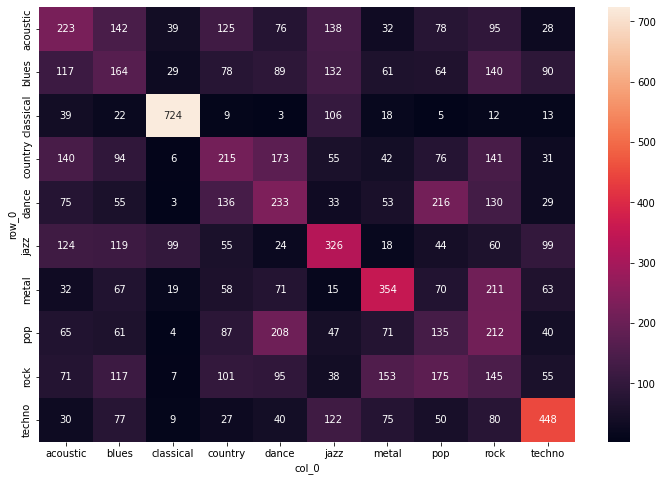

In [104]:
y_train_pred = cross_val_predict(dtc, X_train, y_train, cv=3)
cf_matrix = pd.crosstab(levels[y_train],levels[y_train_pred])
plt.figure(figsize=(12,8))
heatmap(cf_matrix, annot=True, fmt='g')

In [112]:
dtc.predict_proba(X_train)[300]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [113]:
y_train[300]

2

## Hyperparameter regularization with Grid Search

In [96]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
param_grid = {
    'max_depth' : [i for i in range(2, 10)],
    'max_features' : ['sqrt', 'log2', None],
    'min_samples_split': [3, 6, 9, 12, 15],
    'min_samples_leaf': [3, 6, 9, 12, 15]
}
grid_search = GridSearchCV(dtc, param_grid, cv=KFold(3, random_state=43, shuffle=True))
grid_search.fit(X_train, y_train)
print(grid_search.best_params_, grid_search.best_score_)

{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 6} 0.3745833333333333


## Optimizing the Decision Tree Classifier

In [97]:
dtc_optimal = DecisionTreeClassifier(
    max_depth=8, 
    max_features='log2', 
    min_samples_leaf=12, 
    min_samples_split=6
)
dtc_optimal.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features='log2', min_samples_leaf=12,
                       min_samples_split=6)

## Performance of the tuned Decision Tree Classifier

In [98]:
cross_val_score(dtc_optimal, X_train, y_train, cv=3, scoring='accuracy')

array([0.3646875, 0.3659375, 0.3596875])

<AxesSubplot:xlabel='col_0', ylabel='row_0'>

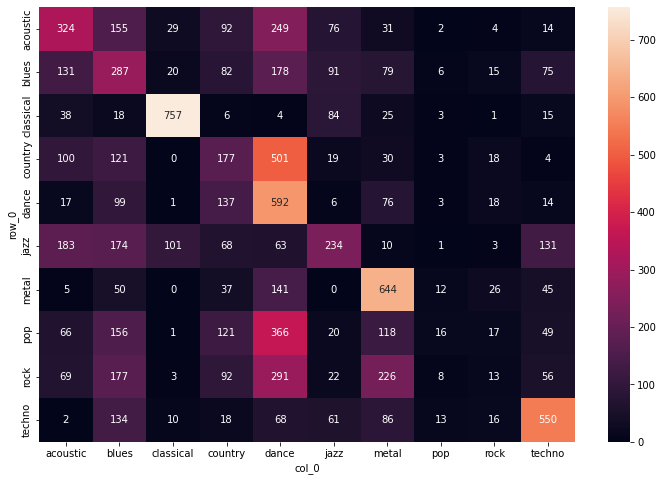

In [99]:
y_train_pred_opt = cross_val_predict(dtc2, X_train, y_train, cv=3)
cf_matrix = pd.crosstab(levels[y_train],levels[y_train_pred_opt])
plt.figure(figsize=(12,8))
heatmap(cf_matrix, annot=True, fmt='g')

### Conclusions

* The Decision Tree Classifier has very low accuracy despite the hyper parameter tuning
* It is able to partially classify some genres like `dance`, `classical`, and `metal`. The result are mostly classified into wrong categories.

## Training Decision tree with dataset stratified w.r.t. loudness

In [115]:
df_loudness = pd.read_csv('data/loudness_train.csv')

In [116]:
# Keeping columns energy, loudness, acousticness and instrumentalness, dropping the rest
columns = ['danceability', 'mode', 'liveness', 'speechiness', 'valence', 'tempo', 'time_signature', 'genre']
X_train_l = df_loudness.drop(columns, axis=1)
y_train_l, levels_l = pd.factorize(df['genre']) # Encoding categorical data to numeric categories

In [117]:
dtc_optimal_l = DecisionTreeClassifier(
    max_depth=8, 
    max_features='log2', 
    min_samples_leaf=12, 
    min_samples_split=6
)
dtc_optimal.fit(X_train_l, y_train_l)

DecisionTreeClassifier(max_depth=8, max_features='log2', min_samples_leaf=12,
                       min_samples_split=6)

In [118]:
cross_val_score(dtc_optimal, X_train, y_train, cv=3, scoring='accuracy')

array([0.3653125, 0.353125 , 0.35875  ])

<AxesSubplot:xlabel='col_0', ylabel='row_0'>

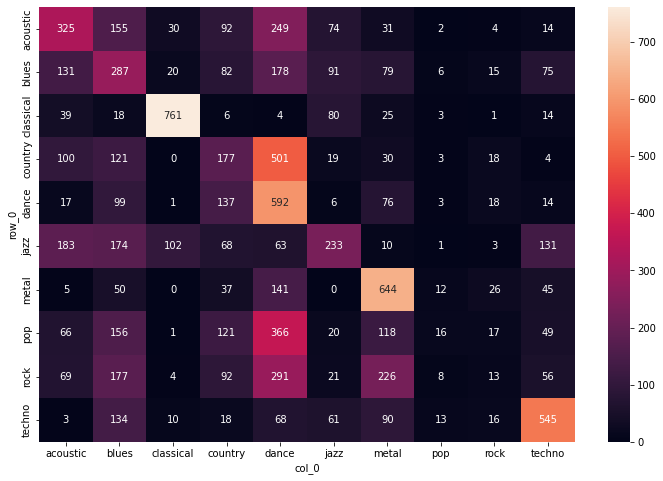

In [119]:
y_train_pred_opt = cross_val_predict(dtc2, X_train, y_train, cv=3)
cf_matrix = pd.crosstab(levels[y_train],levels[y_train_pred_opt])
plt.figure(figsize=(12,8))
heatmap(cf_matrix, annot=True, fmt='g')

There is no significant improvement in the performance when the dataset is stratified wit respect to loudness feature.